In [222]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, norm

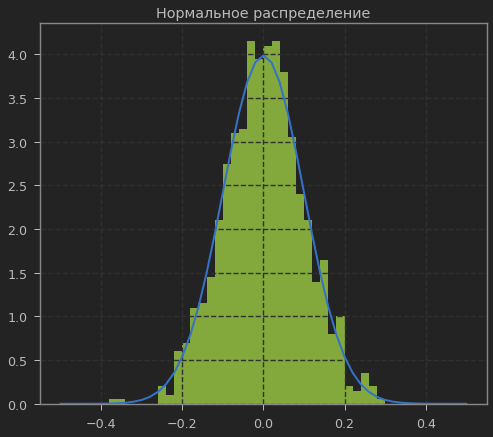

In [418]:
sigma = 0.1
n = 1000
sample = np.random.normal(0, sigma, n)
plt.grid(ls='--')
count, bins, patches = plt.hist(sample, range=(-0.5, 0.5), bins=50, density=True, color='g')
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins)**2 / (2 * sigma**2) ), linewidth=2, color='b')
plt.title("Нормальное распределение")
plt.show()

Статистика: $\dfrac{1}{n}\sum\limits_kX_k^2$

Интервал: $\left(\sum\limits_kX_k^2/\lambda_{(1+\gamma)/2}, \sum\limits_kX_k^2/\lambda_{(1-\gamma)/2}  \right)$

In [350]:
def first(n, sigma, gamma):
    n = int(n)
    sample = np.random.normal(0, sigma, n)
    sq = np.sum(np.power(sample, 2))
    stat1 = sq/n
    p1 = (1+gamma)/2
    p2 = (1-gamma)/2
    return np.array([sq/chi2.ppf(p1, n), sq/chi2.ppf(p2, n), stat1])

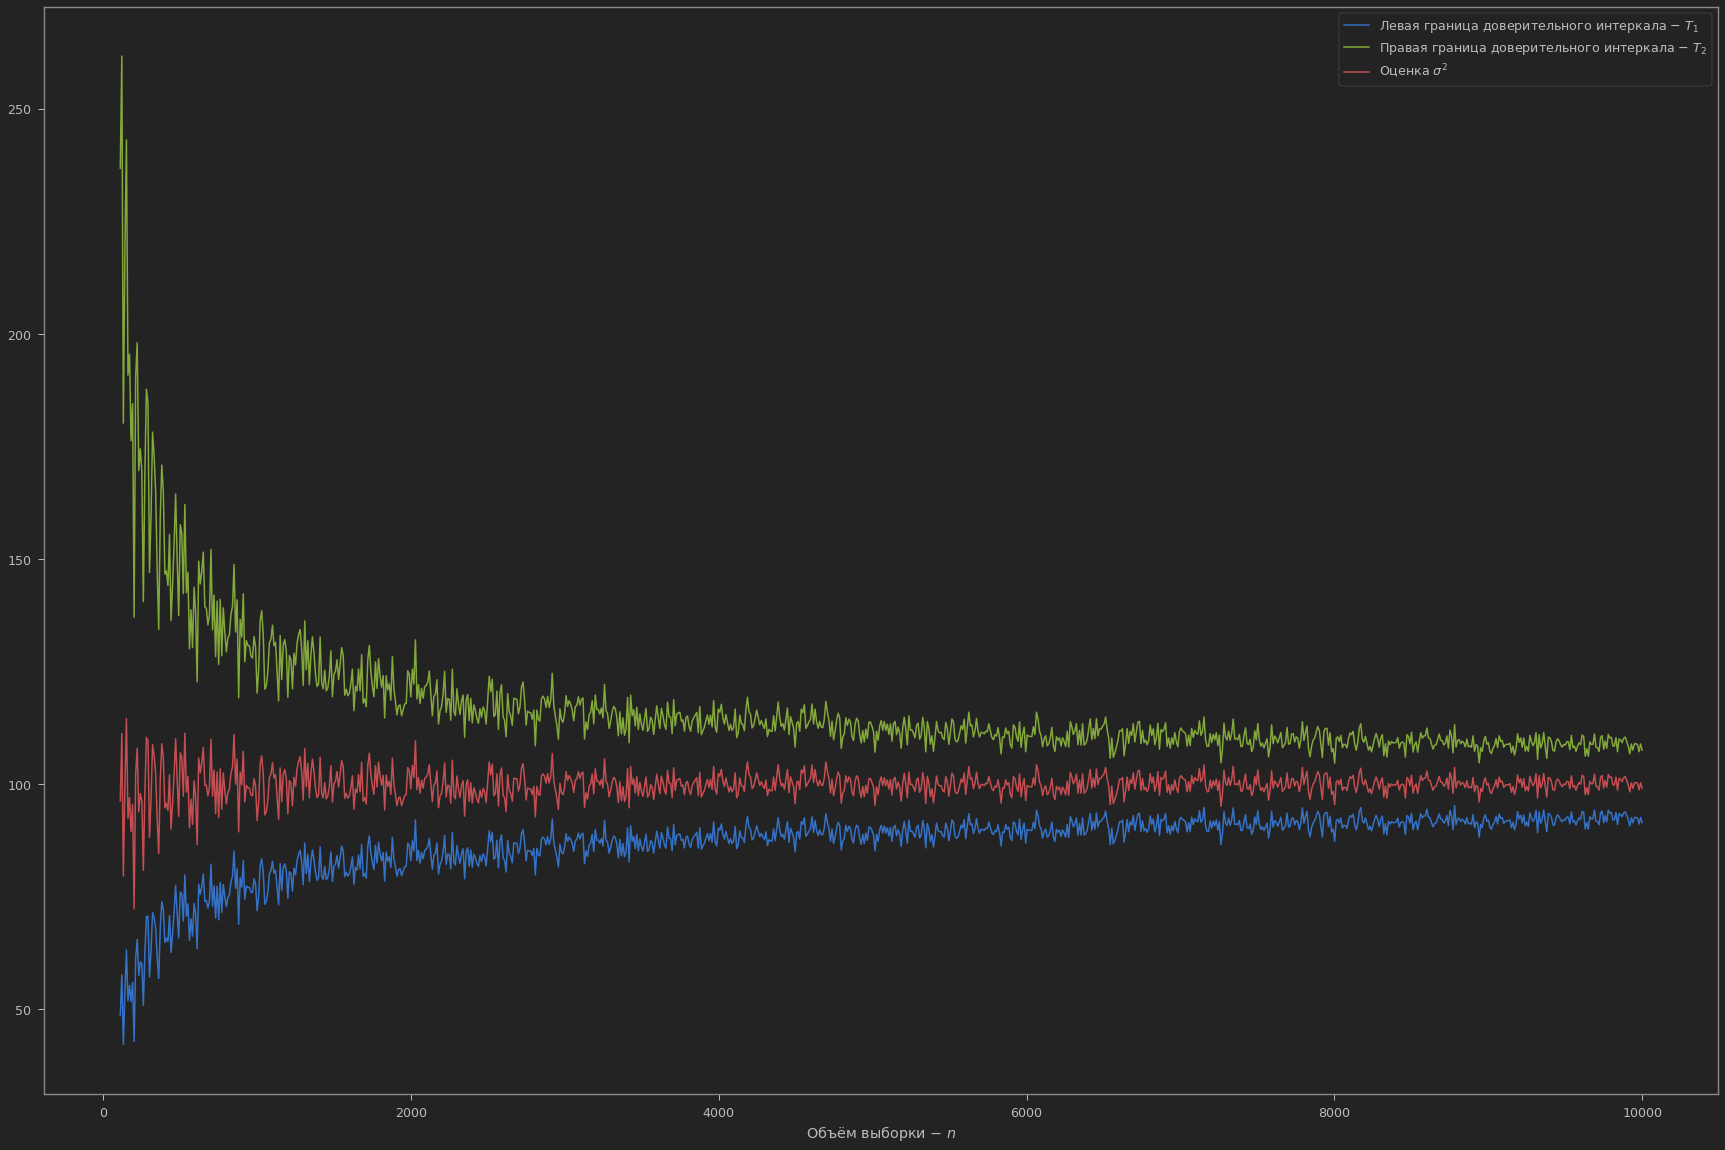

In [415]:
sigma = 10
gamma = 0.99999999
n = 10000
N = np.linspace(10, 10000, 1001)
n = 1001
CI = np.zeros(3*n)
CI = CI.reshape(n, 3)
for i in range(n):
    CI[i] = first(N[i], sigma, gamma)
plt.figure(figsize = (30, 20))
a = 10
plt.plot(N[a:], CI[a:,0], label=r'Левая граница доверительного интеркала $-$ $T_1$')
plt.plot(N[a:], CI[a:,1], label=r'Правая граница доверительного интеркала $-$ $T_2$')
plt.plot(N[a:], CI[a:,2], label=r'Оценка $\sigma^2$')
plt.xlabel(r"Объём выборки $-$ $n$")
plt.legend()
plt.show()

In [416]:
CI[-100:,0].mean(), CI[-100:,2].mean(), CI[-100:,1].mean()

(92.20821961411087, 100.08287664012357, 108.89627716353476)

При увеличении объёма выборки доверительный интервал уменьшается, а на следующем графике ещё более крупные выборки. Можно заметить, что в среднем границы интервала асимтотически стремятся к значению статистики, но из-за того, что на каждом шаге генерируется новая случайная выборка и берутся новые случайные значения, около трендов имеются случайные осцилляции. При меньших значениях $\gamma$ амплитуда таких осциляций больше, но при этом в среднем сам интервал уменьшается. 

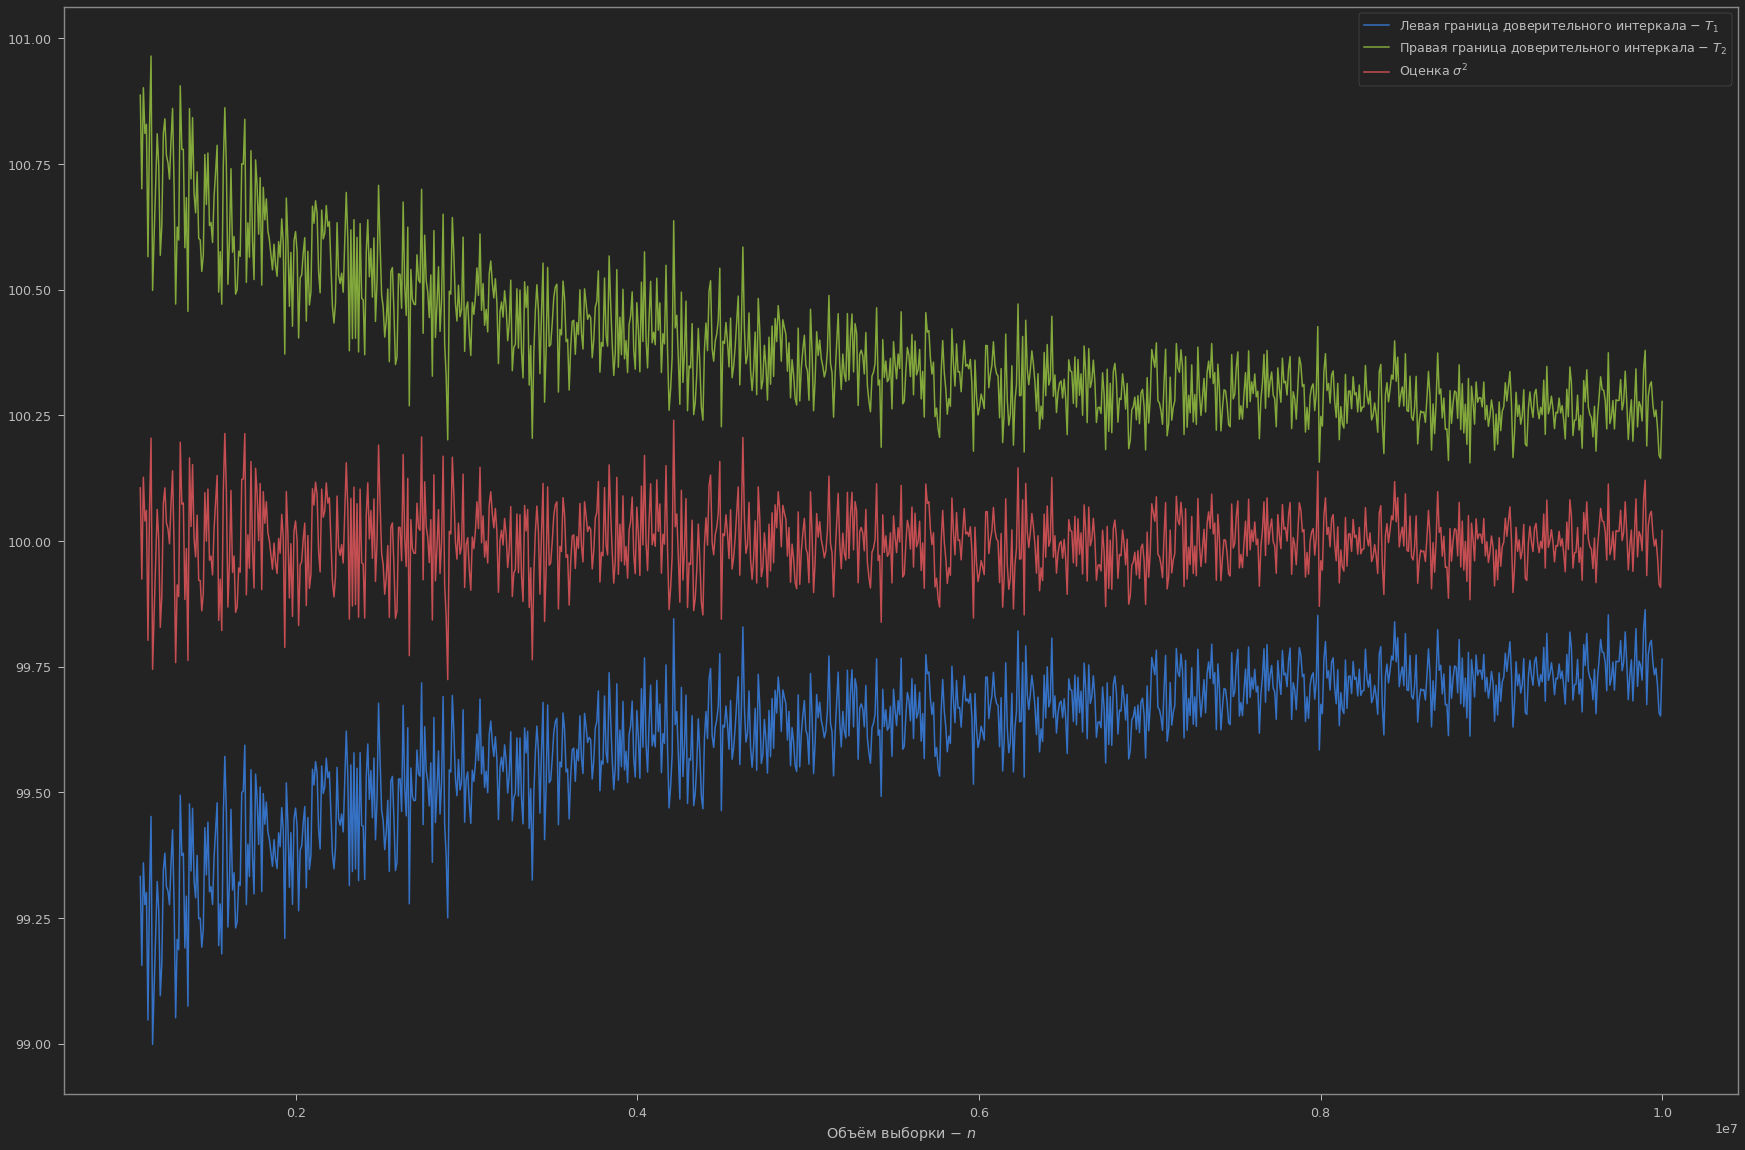

In [398]:
sigma = 10
gamma = 0.99999999
n = 1001
N = np.linspace(1000000, 10000000, 1001)
n = 1001
CI = np.zeros(3*n)
CI = CI.reshape(n, 3)
for i in range(n):
    CI[i] = first(N[i], sigma, gamma)
plt.figure(figsize = (30, 20))
a = 10
plt.plot(N[a:], CI[a:,0], label=r'Левая граница доверительного интеркала $-$ $T_1$')
plt.plot(N[a:], CI[a:,1], label=r'Правая граница доверительного интеркала $-$ $T_2$')
plt.plot(N[a:], CI[a:,2], label=r'Оценка $\sigma^2$')
plt.xlabel(r"Объём выборки $-$ $n$")
plt.legend()
plt.show()

In [401]:
CI[-100:,0].mean(), CI[-100:,2].mean(), CI[-100:,1].mean()

(99.73963061597449, 100.00143484937254, 100.26414691051755)

Как статистика $\left(\dfrac{1}{n}\sum\limits_kX_k\right)^2$ может быть оценкой для дисперсии не понятно, кажется, это ошибка в условии. Интервал тоже ведёт себя неадекватно.

In [384]:
def second(n, sigma, gamma):
    n = int(n)
    sample = np.random.normal(0, sigma, n)
    mean = np.mean(sample)
    stat2 = np.power(mean, 2)
    p1 = (3+gamma)/4
    p2 = (3-gamma)/4
    return np.array([n*stat2/norm.ppf(p1)**2, n*stat2/norm.ppf(p2)**2, stat2])

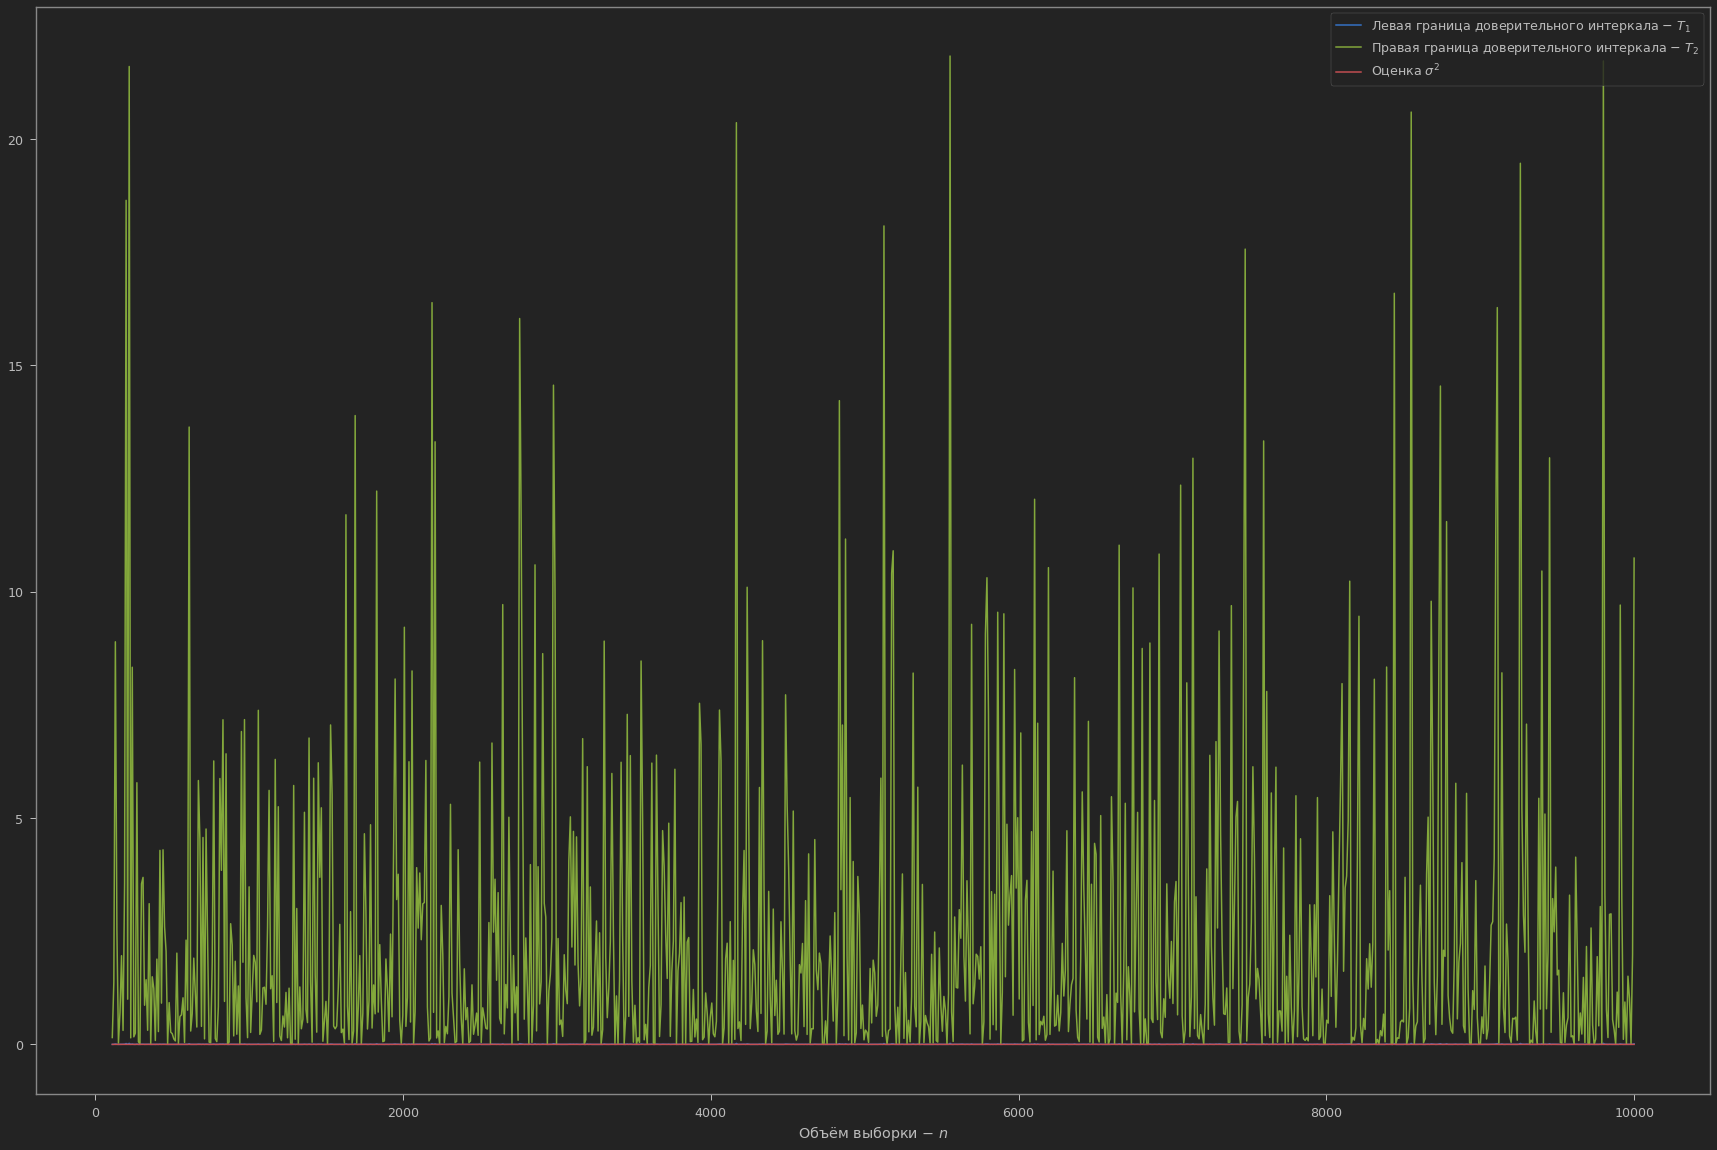

In [386]:
sigma = 0.1
gamma = 0.9
n = 100000
N = np.linspace(10, 10000, 1001)
n = 1001
CI = np.zeros(3*n)
CI = CI.reshape(n, 3) 
for i in range(n):
    CI[i] = second(N[i], sigma, gamma)
plt.figure(figsize = (30, 20))
a = 10
plt.plot(N[a:], CI[a:,0], label=r'Левая граница доверительного интеркала $-$ $T_1$')
plt.plot(N[a:], CI[a:,1], label=r'Правая граница доверительного интеркала $-$ $T_2$')
plt.plot(N[a:], CI[a:,2], label=r'Оценка $\sigma^2$')
plt.xlabel(r"Объём выборки $-$ $n$")
plt.legend()
plt.show()